In [370]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [371]:
df = pd.read_csv('dados_sinteticos_com_erros_atualizado.csv')
df.isnull().sum()
# vendas_por_vendedor = df['vendedor'].value_counts()
# print(vendas_por_vendedor)

id                  0
data                0
hora                0
cliente             0
produto             0
valor_x             0
quantidade          0
total               0
status              0
cidade              0
estado              0
pais                0
cep                 0
frete               0
pagamento           0
vendedor            0
categoria_x         0
marca               0
modelo              0
cor            160226
tamanho             0
peso                0
altura              0
largura             0
comprimento         0
categoria_y         0
valor_y             0
categoria           0
valor               0
dtype: int64

In [372]:
# Substituir os valores nulos na coluna 'cor' por "Cor não especificada ou não relevante"
df['cor'].fillna("Cor não especificada ou não relevante", inplace=True)

df.isnull().sum()

C:\Users\gustavo\AppData\Local\Temp\ipykernel_7516\13997457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cor'].fillna("Cor não especificada ou não relevante", inplace=True)


id             0
data           0
hora           0
cliente        0
produto        0
valor_x        0
quantidade     0
total          0
status         0
cidade         0
estado         0
pais           0
cep            0
frete          0
pagamento      0
vendedor       0
categoria_x    0
marca          0
modelo         0
cor            0
tamanho        0
peso           0
altura         0
largura        0
comprimento    0
categoria_y    0
valor_y        0
categoria      0
valor          0
dtype: int64

In [373]:
# Identificar linhas duplicadas com base em colunas específicas
duplicados = df[df.duplicated(subset=['data', 'hora', 'produto', 'cliente', 'quantidade'])]

# Obter o número de linhas duplicadas antes da remoção
num_linhas_duplicadas = duplicados.shape[0]

# Remover linhas duplicadas mantendo apenas o primeiro registro
df = df.drop_duplicates(subset=['data', 'hora', 'produto', 'cliente', 'quantidade'], keep='first')

print("DataFrame sem linhas duplicadas:")
print(df)

# Obter o número de linhas duplicadas após a remoção delas
num_linhas_duplicadas_apos_exclusao = df[df.duplicated(subset=['data', 'hora', 'produto', 'cliente', 'quantidade'])].shape[0]

print("Número de linhas duplicadas antes da exclusão:", num_linhas_duplicadas)
print("Número de linhas duplicadas após a exclusão:", num_linhas_duplicadas_apos_exclusao)


DataFrame sem linhas duplicadas:
           id        data      hora            cliente  \
0           1  2017-09-20  08:12:57        Filipe Cruz   
1           2  2019-07-17  18:26:47       Daniel Silva   
2           3  2018-01-20  15:55:07       Victor Silva   
3           4  2016-06-21  11:36:07  Vanessa Rodrigues   
4           5  2015-05-01  18:08:24      Luiz Bandeira   
...       ...         ...       ...                ...   
214285  49996  2015-02-25  08:01:49        Filipe Cruz   
214286  49997  2015-04-26  18:17:53       Maycon Massi   
214287  49998  2016-08-03  22:28:46        Júlio Silva   
214295  49999  2018-03-20  20:57:09     João Rodrigues   
214303  50000  2018-04-27  17:47:14       Pedro Soares   

                               produto  valor_x  quantidade        total  \
0                  Isotônico Coca-Cola    96.87           7    38.092982   
1               Lembrancinha Festa Box    92.21           7   123.142236   
2                       Convite Piffer   1

In [374]:
print(df['cidade'].unique())
#removendo a coluna CIDADE porque ela não possui dados
df = df.drop(columns=['cidade'])



['Cidade']


In [375]:
# Imprimir os valores únicos da coluna 'pais'
print(df['pais'].unique())
print(df['estado'].unique())

# Filtrar o DataFrame para incluir apenas as linhas onde o país seja um dos países listados
outros_paises_df = df[df['pais'].isin(['Chile', 'Uruguai', 'Argentina', 'Colômbia', 'Paraguai'])]

# Selecionar apenas as colunas 'cliente', 'produto', 'estado' e 'pais'
outros_paises_df = outros_paises_df[['cliente', 'produto', 'estado', 'pais']]

# Analisando os estados e os paises de cada linha para ver se existe erros
print("Linhas onde o país é Chile, Uruguai, Argentina, Colômbia ou Paraguai:")
print(outros_paises_df)

# Reatribuir o DataFrame original apenas com as linhas onde o país é "Brasil", pois todos os estados são brasileiros
df = df[df['pais'] == 'Brasil']

print("DataFrame com todas as linhas onde o país é Brasil:")
print(df)




['Brasil' 'Chile' 'Uruguai' 'Paraguai' 'Colômbia' 'Argentina']
['PR' 'PE' 'SC' 'GO' 'BA' 'TO' 'RO' 'CE' 'PB' 'RJ' 'AL' 'MA' 'AP' 'RS'
 'SP' 'DF' 'SE' 'MG' 'MS' 'AC' 'RR' 'RN' 'ES' 'PI' 'AM' 'PA' 'MT']
Linhas onde o país é Chile, Uruguai, Argentina, Colômbia ou Paraguai:
                cliente                   produto estado       pais
7        Gustavo Soares             Impressora LG     RO      Chile
101         Alyson Neto                 Carne JBS     AC      Chile
160     Júlio Rodrigues            Vestido Mizuno     MS    Uruguai
177      Maycon Cardoso       borracha Americanas     SP   Paraguai
224         Daniel Cruz            Bicicleta Vans     MG   Colômbia
...                 ...                       ...    ...        ...
213747     Sávio Santos    Micro-ondas Electrolux     RJ   Colômbia
213763     Victor Costa                cola Extra     RR   Paraguai
213837  Sergio Demarque           Carrinho Petzoo     BA   Colômbia
213845   Alyson Cardoso             Chapéu Piffer

In [376]:
# Criar a coluna "valor_real" que é a divisão do total pela quantidade, para descobrir qual foi o valor pago em cada compra
df['valor_real'] = df.apply(lambda row: row['total'] / row['quantidade'], axis=1)

# Selecionar apenas as colunas 'valor_real', 'quantidade', 'produto', 'cliente' e 'total'
exibicao_rapida = df[['valor_real', 'quantidade', 'produto', 'cliente', 'valor_x', 'valor_y', 'vendedor', 'total']]

print("Exibição rápida:")
print(exibicao_rapida)



Exibição rápida:
        valor_real  quantidade                         produto  \
0         5.441855           7             Isotônico Coca-Cola   
1        17.591748           7          Lembrancinha Festa Box   
2         7.453778           5                  Convite Piffer   
3         1.551771          10                  Vinho Heineken   
4        46.603759           7                    Chinelo Fila   
...            ...         ...                             ...   
214285  273.862020           9             Frost Free Britânia   
214286  332.952342           5  Escrivaninha Móveis Kappesberg   
214287   16.105031          10                Maquiagem Eudora   
214295  186.580374           2                     Câmera Sony   
214303  106.270620           5               Raquete Olympikus   

                  cliente  valor_x     valor_y vendedor        total  
0             Filipe Cruz    96.87    5.441855   Loja 1    38.092982  
1            Daniel Silva    92.21   17.591748  

In [377]:
# Concatenar as colunas 'categoria_x' e 'categoria_y' e armazenar na coluna 'categorias'
df['categorias'] = df['categoria_x'] + ', ' + df['categoria_y']

# Remover as duplicatas da coluna 'categorias'
df['categorias'] = df['categorias'].apply(lambda x: ', '.join(set(x.split(', '))))

print(df[['categorias']])

df = df.drop(columns=['categoria_x', 'categoria_y'])


                      categorias
0                        bebidas
1            artigos para festas
2            artigos para festas
3                        bebidas
4                       calçados
...                          ...
214285                      casa
214286                    móveis
214287                     saúde
214295  eletrônicos, informática
214303                  esportes

[47503 rows x 1 columns]


In [378]:
print(df.groupby('modelo')['valor_real'].mean())


modelo
Alarme       262.061436
Armário      242.699631
Balão         30.504409
Banco        305.193393
Batedeira    251.581257
                ...    
régua         27.345059
tesoura       27.703014
Água           3.628418
Óculos        33.922698
Óleo         354.662892
Name: valor_real, Length: 128, dtype: float64


In [379]:
# Calcular a média e o desvio padrão para cada modelo
media_por_modelo = df.groupby('modelo')['valor_real'].mean()
desvio_padrao_por_modelo = df.groupby('modelo')['valor_real'].std()

# Definir o limiar (por exemplo, 2 desvios padrão)
limiar = 1

# Identificar modelos cujo valor_real está significativamente acima ou abaixo da média do seu tipo
modelos_fora_do_limiar = []
for modelo, media, desvio_padrao in zip(media_por_modelo.index, media_por_modelo, desvio_padrao_por_modelo):
    valores_reais_modelo = df[df['modelo'] == modelo]['valor_real']
    valores_fora_do_limiar = valores_reais_modelo[(valores_reais_modelo < media - limiar * desvio_padrao) | (valores_reais_modelo > media + limiar * desvio_padrao)]
    modelos_fora_do_limiar.extend(valores_fora_do_limiar.index)

# Remover as ocorrências dos modelos que estão fora do limiar
df_limpo = df.drop(index=modelos_fora_do_limiar)

print("DataFrame após a remoção das ocorrências de modelos que fogem muito da média do seu tipo:")
print(df_limpo)


DataFrame após a remoção das ocorrências de modelos que fogem muito da média do seu tipo:
           id        data      hora          cliente  \
1           2  2019-07-17  18:26:47     Daniel Silva   
4           5  2015-05-01  18:08:24    Luiz Bandeira   
5           6  2015-09-23  14:54:22  Maycon Demarque   
15          9  2017-06-08  08:44:51     Pedro Soares   
23         10  2017-06-20  12:49:25      Otávio Neto   
...       ...         ...       ...              ...   
214285  49996  2015-02-25  08:01:49      Filipe Cruz   
214286  49997  2015-04-26  18:17:53     Maycon Massi   
214287  49998  2016-08-03  22:28:46      Júlio Silva   
214295  49999  2018-03-20  20:57:09   João Rodrigues   
214303  50000  2018-04-27  17:47:14     Pedro Soares   

                               produto  valor_x  quantidade        total  \
1               Lembrancinha Festa Box    92.21           7   123.142236   
4                         Chinelo Fila    82.24           7   326.226314   
5        

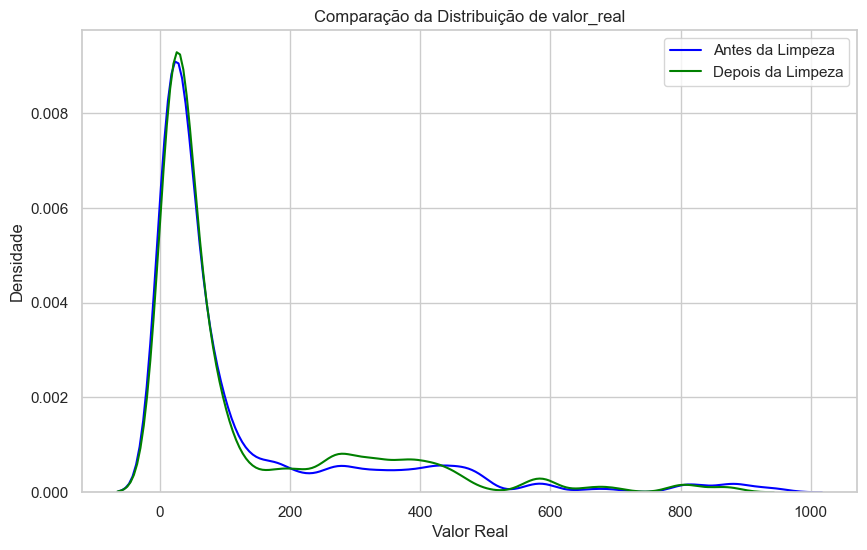

In [380]:
# Configurações visuais
plt.figure(figsize=(10, 6))

# Antes da limpeza
sns.kdeplot(df['valor_real'], color='blue', label='Antes da Limpeza')

# Depois da limpeza
sns.kdeplot(df_limpo['valor_real'], color='green', label='Depois da Limpeza')

plt.title('Comparação da Distribuição de valor_real')
plt.xlabel('Valor Real')
plt.ylabel('Densidade')
plt.legend()
plt.show()
